<a href="https://colab.research.google.com/github/Adrian-Stahl/Project-4/blob/main/Copy_of_Credit_Card_Fraud_Detection_Machine_Learning_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
#  Import and read the charity_data.csv.
import pandas as pd 



In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
#initial_df = open('/content/drive/MyDrive/transactions_train.csv')
initial_df = open('/content/drive/MyDrive/transactions_train.csv')

In [40]:
initial_df

<_io.TextIOWrapper name='/content/drive/MyDrive/transactions_train.csv' mode='r' encoding='UTF-8'>

In [41]:
initial_df = pd.read_csv(
    Path('/content/drive/MyDrive/transactions_train.csv')
)

In [42]:
display(initial_df.head())

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [43]:
#Dropping the non-beneficial step column, 'step'
beta_df = initial_df.drop(columns = ['step'])

#optional route #1 - Dropping all columns that have alphabetic values. 
gamma_df = beta_df.drop(columns = ['type', 'nameOrig', 'nameDest'])

In [44]:
#displaying the dataset with the dropped column
gamma_df

#beta_df['type'] = beta_df['type'].astype(float)

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,9839.64,170136.00,160296.36,0.00,0.00,0
1,1864.28,21249.00,19384.72,0.00,0.00,0
2,181.00,181.00,0.00,0.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...
6351188,162326.52,162326.52,0.00,0.00,0.00,1
6351189,162326.52,162326.52,0.00,0.00,162326.52,1
6351190,2763398.31,2763398.31,0.00,0.00,0.00,1
6351191,2763398.31,2763398.31,0.00,339515.35,3102913.66,1


In [45]:
#determining the number of unique values in each column
for x in gamma_df.columns:
  print(x, len(gamma_df[x].unique()))

amount 5308896
oldbalanceOrig 1844245
newbalanceOrig 2677400
oldbalanceDest 3609168
newbalanceDest 3549046
isFraud 2


Creating the labels set from the 'isFraud' column, and then create the features (x) dataframe from the remaining columns. 

In [46]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = gamma_df['isFraud']

# Separate the X variable, the features
X = gamma_df.drop(columns = 'isFraud')

In [47]:
# Review the y variable Series
display(y.head())
display(y.tail())

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

6351188    1
6351189    1
6351190    1
6351191    1
6351192    0
Name: isFraud, dtype: int64

In [48]:
# Review the X variable DataFrame
display(X.head())
display(X.tail())

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
6351188,162326.52,162326.52,0.00,0.00,0.00
6351189,162326.52,162326.52,0.00,0.00,162326.52
6351190,2763398.31,2763398.31,0.00,0.00,0.00
6351191,2763398.31,2763398.31,0.00,339515.35,3102913.66
6351192,578.21,10575.00,9996.79,127072.23,127650.44


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [49]:
# Check the balance of our target values
y.value_counts()

0    6343476
1       7717
Name: isFraud, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [50]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state = 1
)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [51]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression



In [52]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_model = LogisticRegression(random_state = 1)



In [53]:
# Fit the model using training data
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [54]:
# Make a prediction using the testing data
LR_predictions = LR_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [55]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, LR_predictions)

0.8904248433622179

In [56]:
# Generate a confusion matrix for the model

#"WORK ON THIS ONE CELL!!!!!"
delta = confusion_matrix(y_test, LR_predictions)
delta_df = pd.DataFrame(delta, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
delta_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),1583154,2718
Actual Non-Healthy Loans (high-risk),419,1508


In [57]:
# Print the classification report for the model

#report_dict = classification_report(y_test, LR_predictions, output_dict=True)
#pd.DataFrame(report_dict)
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1585872
           1       0.36      0.78      0.49      1927

    accuracy                           1.00   1587799
   macro avg       0.68      0.89      0.74   1587799
weighted avg       1.00      1.00      1.00   1587799



---




## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [58]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ROS_model = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ROS_model.fit_resample(X_train, y_train)

In [59]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

0    4757604
1    4757604
Name: isFraud, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [60]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
LR_oversampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
LR_oversampled_model.fit(X_oversampled, y_oversampled)

# Make a prediction using the testing data
LR_oversampled_pred = LR_oversampled_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [61]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, LR_oversampled_pred)

0.8426175294757221

In [62]:
# Generate a confusion matrix for the model


epsilon = confusion_matrix(y_test, LR_oversampled_pred)
epsilon_df = pd.DataFrame(epsilon, 
                                index = ['Actual Healthy Loans (low-risk)', 
                                'Actual Non-Healthy Loans (high-risk)'], 
                                columns = ['Predicted Healthy Loans (low-risk)', 'Predicted Non-Healthy Loans (high-risk)']
                              )
epsilon_df

,Predicted Healthy Loans (low-risk),Predicted Non-Healthy Loans (high-risk)
Actual Healthy Loans (low-risk),1122083,463789
Actual Non-Healthy Loans (high-risk),43,1884


In [63]:
# Print the classification report for the model
print(classification_report(y_test, LR_oversampled_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83   1585872
           1       0.00      0.98      0.01      1927

    accuracy                           0.71   1587799
   macro avg       0.50      0.84      0.42   1587799
weighted avg       1.00      0.71      0.83   1587799



In [64]:
#turned our dataframe into a csv
gamma_df.to_csv('filefortableau.csv', index=False)

In [ ]:
#downloaded the new csv file 
from google.colab import files
files.download('filefortableau.csv')


---

*Graphs*

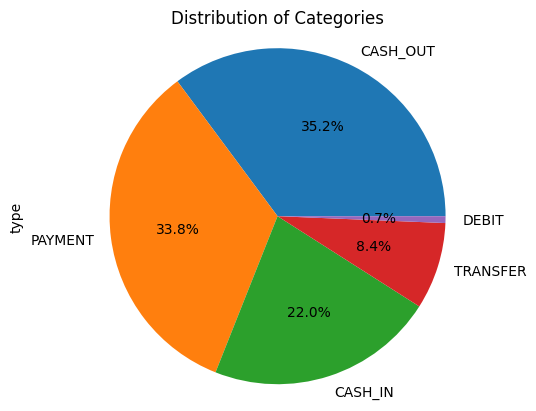

In [69]:
#pie_chart_df=pd.Dataframe(gamma_df)
#gamma_df.plot(kind='pie', y='type', labels=gamma_df['type'], autopct='%1.1f%%')
#plt.axis('equal')
#plt.show()

label_counts = beta_df['type'].value_counts()
label_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Categories")
#Display the chart
plt.axis('equal')
plt.show()

CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER—relate to financial activities involving the movement of funds. Here's an explanation of each transaction:

*CASH-IN*: This transaction refers to the action of depositing cash into an account. It involves adding funds to a specific account, increasing the account balance. For example, if you deposit cash into your bank account, it would be recorded as a CASH-IN transaction.

*CASH-OUT*: This transaction represents the withdrawal or disbursement of cash from an account. It involves reducing the account balance by taking out funds in the form of physical cash. For instance, if you withdraw money from an ATM or make a cash withdrawal at a bank, it would be recorded as a CASH-OUT transaction.

*DEBIT*: A DEBIT transaction typically refers to the reduction of funds from an account due to a purchase or expense. It represents an outflow of funds from the account. For example, when you use a debit card to make a purchase or pay for a service, the transaction is recorded as a DEBIT.

*PAYMENT*: A PAYMENT transaction signifies the transfer of funds from one party to another for the settlement of a debt or obligation. It involves transferring funds to fulfill a payment obligation. It can include various forms of payments such as electronic transfers, checks, online payments, or other payment methods.

*TRANSFER*: A TRANSFER transaction refers to the movement of funds between different accounts or entities. It involves transferring funds from one account to another, typically within the same financial institution or between different financial institutions. Transfers can be initiated for various reasons, such as transferring funds between personal accounts, transferring money to another individual or business, or consolidating funds from multiple accounts.

It's important to note that the specific definitions and categorizations of these transactions may vary depending on the context and financial institution. The terms used by different institutions or systems may have slightly different meanings or include additional transaction types.